In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("testdata.csv")
usdata = data[data["Country/Region"] == "US"]
usdata.head()



,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,32.0,1/22/20,Washington,US,1/22/20 17:00,1.0,0.0,0.0
69,70.0,1/23/20,Washington,US,1/23/20 17:00,1.0,0.0,0.0
117,118.0,1/24/20,Washington,US,1/24/20 17:00,1.0,0.0,0.0
118,119.0,1/24/20,Chicago,US,1/24/20 17:00,1.0,0.0,0.0
158,159.0,1/25/20,Washington,US,1/25/20 17:00,1.0,0.0,0.0


In [43]:
aprilfirst2019 = 327842998
aprilfourteenth2019 = 327895766
aprilfourteenpopulation = 329515369
aprilfirstpopulation = 329459499
popgrowth2019 = ((aprilfourteenth2019 - aprilfirst2019) / aprilfirst2019)*100
print("The growth rate for the first two weeks of April in 2019 was", popgrowth2019)
popgrowth2020 = ((aprilfourteenpopulation-aprilfirstpopulation) / aprilfirstpopulation)*100
print("The growth rate for the first two weeks of April in 2020 was",popgrowth2020)

The growth rate for the first two weeks of April in 2019 was 0.016095509229085318
The growth rate for the first two weeks of April in 2020 was 0.016958078358517748


In [45]:
USpopulation = 329515369
contactrate = (usdata['Confirmed'].sum()/USpopulation)*100
contactrate

2.089734090673021

In [37]:
recoveryrate = (usdata['Recovered'].sum()/usdata['Confirmed'].sum())*100
recoveryrate

5.131284585597289

In [39]:
moralityrate = (usdata['Deaths'].sum()/usdata['Confirmed'].sum())*100
moralityrate

3.1818640588615006

In [46]:
usdata.sum()

SNo                                                      2.25703e+07
ObservationDate    1/22/201/23/201/24/201/24/201/25/201/25/201/26...
Province/State     WashingtonWashingtonWashingtonChicagoWashingto...
Country/Region     USUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUSUS...
Last Update        1/22/20 17:001/23/20 17:001/24/20 17:001/24/20...
Confirmed                                                  6.886e+06
Deaths                                                        219103
Recovered                                                     353340
dtype: object

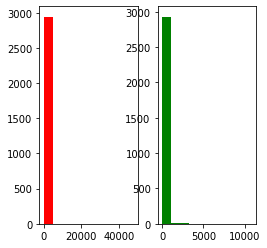

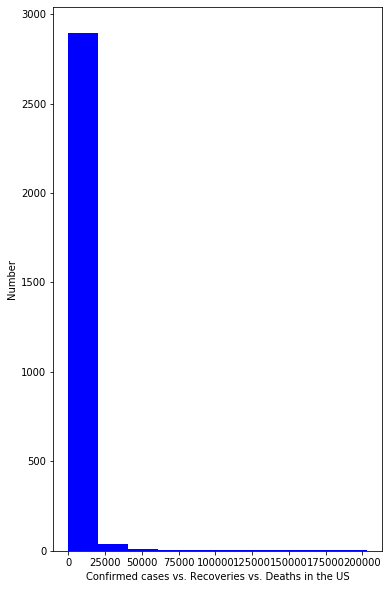

In [70]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

list1 = usdata['Recovered']
list2 = usdata['Deaths']
list3 = usdata['Confirmed']

plt.subplot(1, 3, 1)  # 1 line, 2 rows, index nr 1 (first position in the subplot)
plt.hist(list1, color='r')
plt.subplot(1, 3, 2)  # 1 line, 2 rows, index nr 2 (second position in the subplot)
plt.hist(list2, color='g')
plt.figure(figsize=(20,10))
plt.subplot(1, 3, 3)
plt.hist(list3, color='b')
plt.xlabel("Confirmed cases vs. Recoveries vs. Deaths in the US")
plt.ylabel("Number")
plt.show()

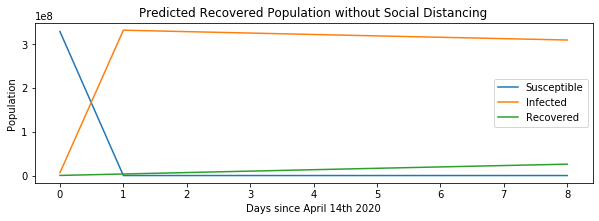

In [117]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
from IPython.display import display, clear_output, set_matplotlib_formats


# The model is expressed in terms of ODEs and this is where
# they are defined in a manner consistent with what odeint wants to see.
# solve the system dy/dt = f(y, t)
# Define a function of the derivatives of this system
def derivatives_sir(y, t, b,c):
        Snow = y[0]
        Inow = y[1]
        Rnow = y[2]
        # the model equations 
        dSdt = -b*Snow*Inow
        dIdt = b*Snow*Inow-c*Inow
        dRdt = c*Inow
      
        return [dSdt, dIdt, dRdt]

# initial conditions
total_population = 329515369  # US Population
susceptible_percent = 100  # percent of total population susceptible to COVID-19
S0 = total_population*susceptible_percent/100  # initial susceptible population  
I0 = 6.886e+06-219103-353340                  # initial infected population
R0 = 219103             # initial recovered population
y0 = [S0, I0, R0]       # initial condition vector
t  = np.arange(0, 9, 1)   # time grid

# rate constants
total_population_modeled = S0+I0+R0
b =  7E-7    # infect rate
c = 1E-2 # recover rate

# solve the ODEs
soln = odeint(derivatives_sir, y0, t, args=(b, c))
S = soln[:, 0]
I = soln[:, 1]
R = soln[:, 2]

plt.figure(figsize=(10,10))
# plot results
plt.subplot(311)
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')

plt.title('Predicted Recovered Population without Social Distancing')
plt.xlabel('Days since April 14th 2020')
plt.ylabel('Population')
plt.legend()


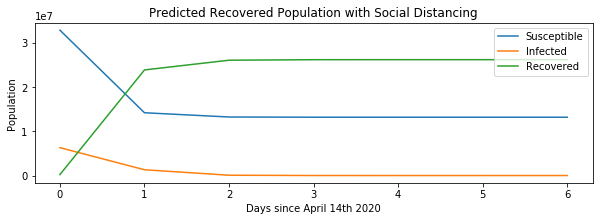

In [51]:
def derivatives_sir_distance(y, t, b_c,b_d,c):
        S_c_now = y[0]
        S_d_now = y[1]
        Inow = y[2]
        Rnow = y[3]
        # the model equations 
        dScdt = -b_c*S_c_now*Inow
        dSddt = -b_d*S_d_now*Inow
        dIdt = b_c*S_c_now*Inow  +  b_d*S_d_now*Inow  -  c*Inow
        dRdt = c*Inow
           
        return [dScdt, dSddt, dIdt, dRdt]

# initial conditions
total_population = 329515369  # US Population
susceptible_percent = 10  # percent of total population susceptible to COVID-19
S0 = total_population*susceptible_percent/100  # initial population susceptible
S_c0 = S0* .1           # initial population close to each other, assume 10% of population
S_d0 = S0* .9           # initial population distancing from each other, assume 90% of population
I0 = 6.886e+06-219103-353340 # initial infected population
R0 = 219103                 # initial recovered population
y0 = [S_c0, S_d0, I0, R0]       # initial condition vector
t  = np.arange(0, 7, 1)   # time grid

# Rate constants
total_population_modeled = S0+I0+R0
b_c =  8E-7     # base infection rate for those close to each other
b_d =  b_c*.2   # infect rate for those distant to each other, assume 20% of those close to each other
c = 5.13        # recover rate

# solve the ODEs
soln = odeint(derivatives_sir_distance, y0, t, args=(b_c,b_d, c))
S = soln[:, 0] + soln[:, 1]   # sum of all susceptible people
I = soln[:, 2]
R = soln[:, 3]

plt.figure(figsize=(10,10))
# plot results
plt.subplot(311)
plt.plot(t, S, label='Susceptible')
plt.plot(t, I, label='Infected')
plt.plot(t, R, label='Recovered')

plt.title('Predicted Recovered Population with Social Distancing')
plt.xlabel('Days since April 14th 2020')
plt.ylabel('Population')
plt.legend()

In [104]:
df1 = pd.read_csv("14to21.csv")
usweek = df1[df1["Country/Region"] == "US"]

day1 = usweek[usweek["ObservationDate"] == "4/14/20"]
day2 = usweek[usweek["ObservationDate"] == "4/15/20"]
day3 = usweek[usweek["ObservationDate"] == "4/16/20"]
day4 = usweek[usweek["ObservationDate"] == "4/17/20"]
day5 = usweek[usweek["ObservationDate"] == "4/18/20"]
day6 = usweek[usweek["ObservationDate"] == "4/19/20"]
day7 = usweek[usweek["ObservationDate"] == "4/20/20"]
day8 = usweek[usweek["ObservationDate"] == "4/21/20"]

recoverweek = [day1['Recovered'].sum(),day2['Recovered'].sum(), day3['Recovered'].sum(), day4['Recovered'].sum(), day5['Recovered'].sum(), day6['Recovered'].sum(), day7['Recovered'].sum(), day8['Recovered'].sum()]
deathweek = [day1['Deaths'].sum(),day2['Deaths'].sum(), day3['Deaths'].sum(), day4['Deaths'].sum(), day5['Deaths'].sum(), day6['Deaths'].sum(), day7['Deaths'].sum(), day8['Deaths'].sum()]
confirmweek = [day1['Confirmed'].sum(),day2['Confirmed'].sum(), day3['Confirmed'].sum(), day4['Confirmed'].sum(), day5['Confirmed'].sum(), day6['Confirmed'].sum(), day7['Confirmed'].sum(), day8['Confirmed'].sum()]
day = [day1['ObservationDate'].sum(),day2['ObservationDate'].sum(), day3['ObservationDate'].sum(), day4['ObservationDate'].sum(), day5['ObservationDate'].sum(), day6['ObservationDate'].sum(), day7['ObservationDate'].sum(), day8['ObservationDate'].sum()]


<Figure size 432x288 with 0 Axes>

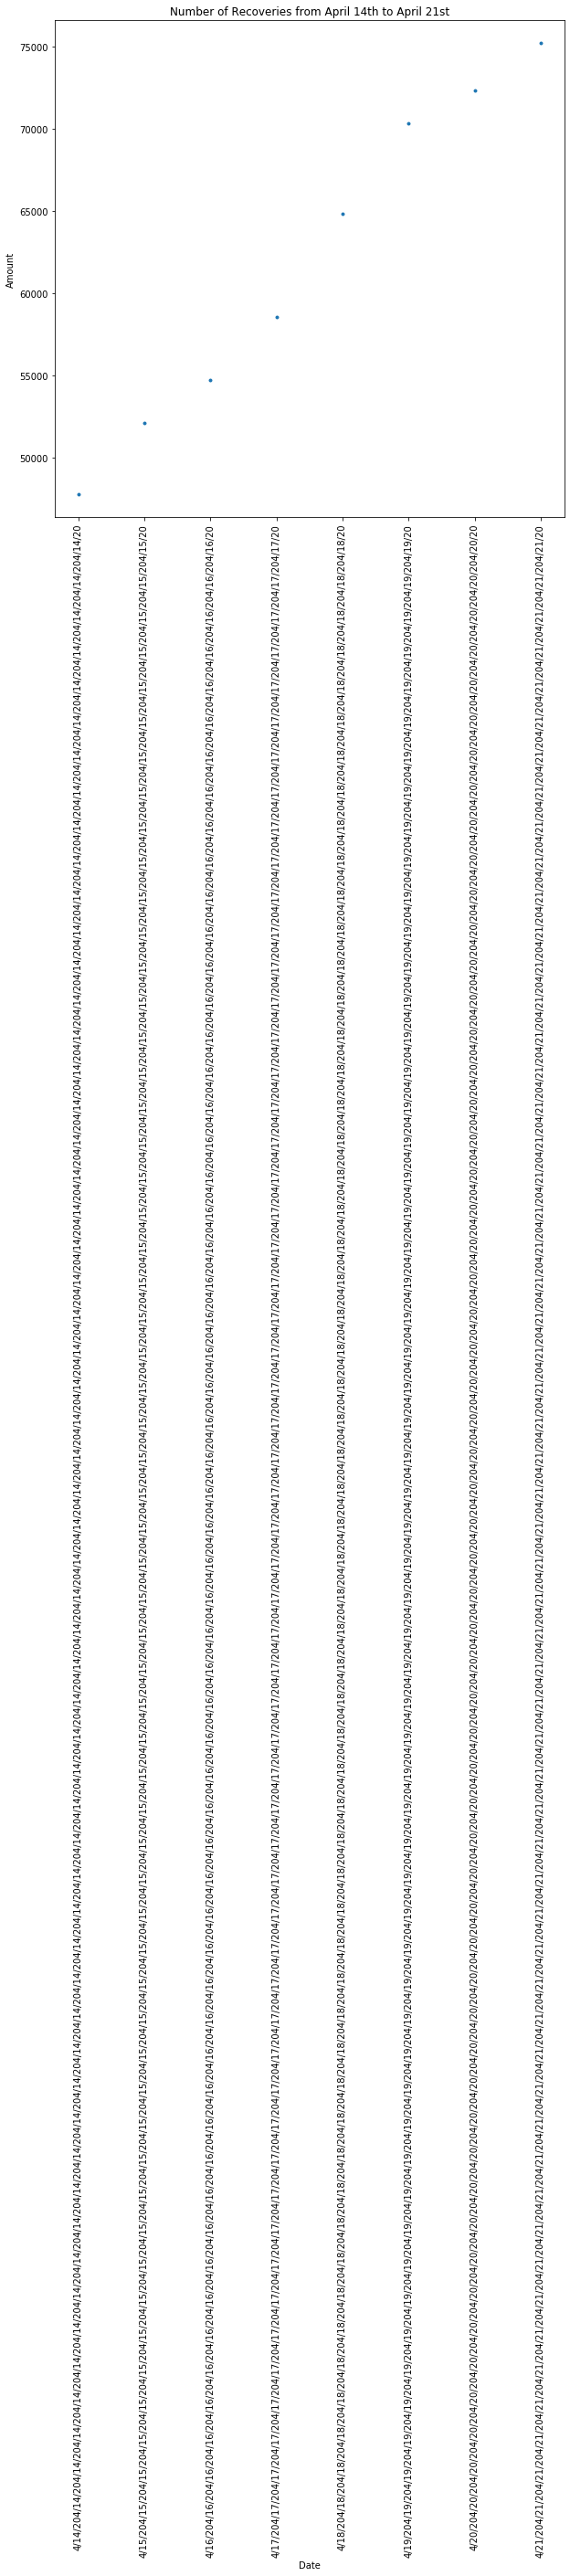

In [107]:
import seaborn as sns
f1=plt.figure(1)


f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=day, y=recoverweek,
                sizes=(1, 8), linewidth=2, ax=ax)
plt.title('Number of Recoveries from April 14th to April 21st')
plt.ylabel('Amount')
plt.xlabel('Date')
ax.tick_params(axis='x', rotation=90)

<Figure size 432x288 with 0 Axes>

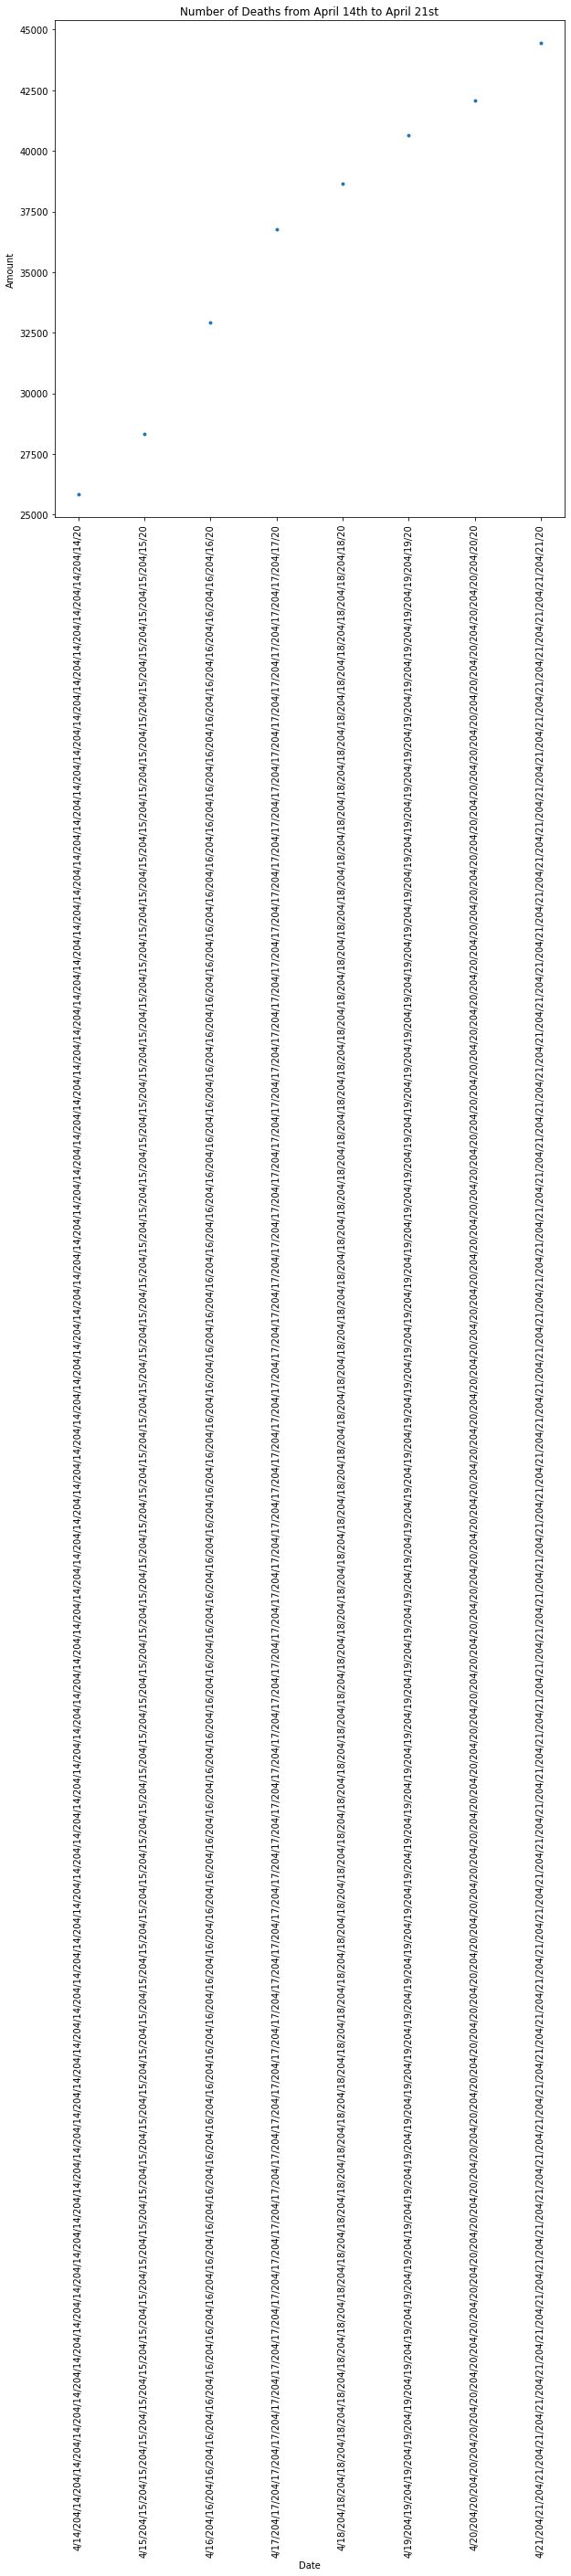

In [108]:
f2=plt.figure(2)


f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=day, y=deathweek,
                sizes=(1, 8), linewidth=2, ax=ax)
plt.title('Number of Deaths from April 14th to April 21st')
plt.ylabel('Amount')
plt.xlabel('Date')
ax.tick_params(axis='x', rotation=90)

<Figure size 432x288 with 0 Axes>

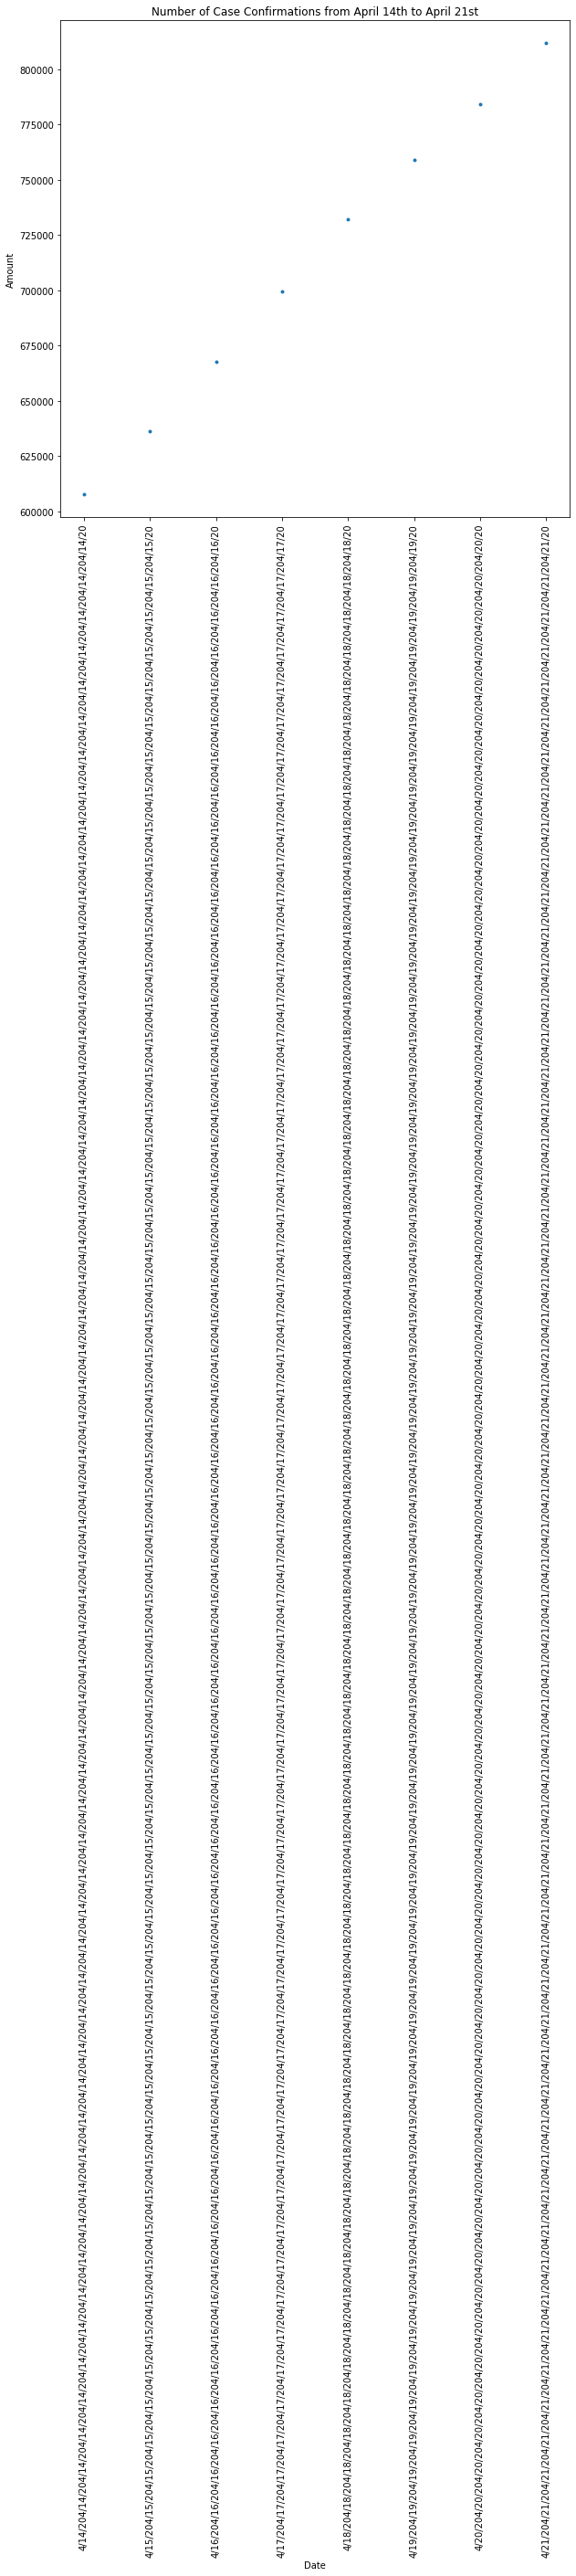

In [109]:
f3=plt.figure(3)


f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=day, y=confirmweek,
                sizes=(1, 8), linewidth=2, ax=ax)
plt.title('Number of Case Confirmations from April 14th to April 21st')
plt.ylabel('Amount')
plt.xlabel('Date')
ax.tick_params(axis='x', rotation=90)


In [119]:
realus = pd.read_csv("testprediction.csv")
real = realus[realus["Country/Region"] == "US"]
newpopulation = 329545453
crate = (real['Confirmed'].sum()/newpopulation)*100
print(crate)

rrate = (real['Recovered'].sum()/real['Confirmed'].sum())*100
print(rrate)

mrate = (real['Deaths'].sum()/real['Confirmed'].sum())*100
print(mrate)

3.6344989411824775
6.690925837703674
4.03245265262046


In [120]:
realspain = pd.read_csv("testprediction.csv")
real = realspain[realspain["Country/Region"] == "Spain"]

rrate = (real['Recovered'].sum()/real['Confirmed'].sum())*100
print(rrate)

mrate = (real['Deaths'].sum()/real['Confirmed'].sum())*100
print(mrate)

31.366738652678766
9.62377194167106


In [121]:
realspain = pd.read_csv("testprediction.csv")
real = realspain[realspain["Country/Region"] == "Italy"]

rrate = (real['Recovered'].sum()/real['Confirmed'].sum())*100
print(rrate)

mrate = (real['Deaths'].sum()/real['Confirmed'].sum())*100
print(mrate)

18.991164184026825
11.934168819509335


In [122]:
realspain = pd.read_csv("testprediction.csv")
real = realspain[realspain["Country/Region"] == "France"]

rrate = (real['Recovered'].sum()/real['Confirmed'].sum())*100
print(rrate)

mrate = (real['Deaths'].sum()/real['Confirmed'].sum())*100
print(mrate)

20.22562639475776
10.297955766546572


In [123]:
realspain = pd.read_csv("testprediction.csv")
real = realspain[realspain["Country/Region"] == "Germany"]

rrate = (real['Recovered'].sum()/real['Confirmed'].sum())*100
print(rrate)

mrate = (real['Deaths'].sum()/real['Confirmed'].sum())*100
print(mrate)

40.11221654969418
2.0911887860486837


In [125]:
realspain = pd.read_csv("testprediction.csv")
real = realspain[realspain["Country/Region"] == "Mainland China"]

rrate = (real['Recovered'].sum()/real['Confirmed'].sum())*100
print(rrate)

mrate = (real['Deaths'].sum()/real['Confirmed'].sum())*100
print(mrate)

67.86013614324752
3.764676211914051


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("time_series_covid_19_confirmed.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,933,996,1026,1092,1176,1279,1351,1463,1531,1703
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,548,562,584,609,634,663,678,712,726,736
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,704,713,717,717,723,723,731,738,738,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,24,24,24,25,25,25,25,26,27


In [13]:
BBox = (df.Long.min(),   df.Long.max(),      
         df.Lat.min(), df.Lat.max())
BBox

(-135.0, 178.065, -51.7963, 71.7069)

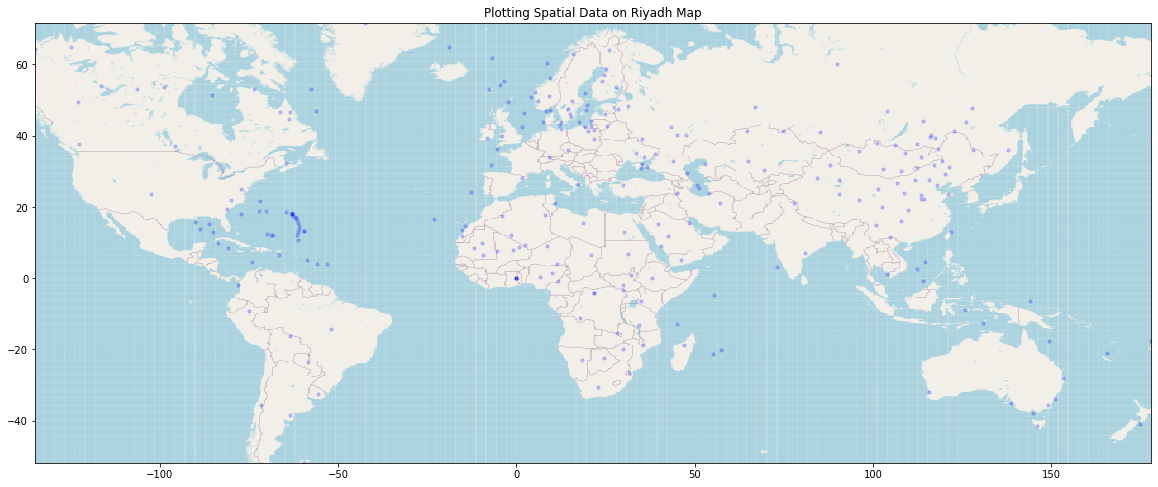

In [25]:
ruh_m = plt.imread('modelmap.png')


fig, ax = plt.subplots(figsize = (20,20))
ax.scatter(df.Long, df.Lat, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Spatial Data on Riyadh Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')